In [1]:
!pip install matplotlib seaborn scipy requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
from zipfile import ZipFile
from io import BytesIO

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:

iBite_table = pd.read_csv('./iBite_table.csv')


iBite_table = iBite_table[['infraclass', 'cohort', 'order', 'suborder', 'superfamily', 'family', 'subfamily', 'tribe', 'genus', 'species',
                           'iBite', 'ID', 'specimen', 'amplification',
                           'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l',
                           'latitude', 'longitude', 'country']]


iBite_table.sort_values(by=['order', 'family'], inplace=True)


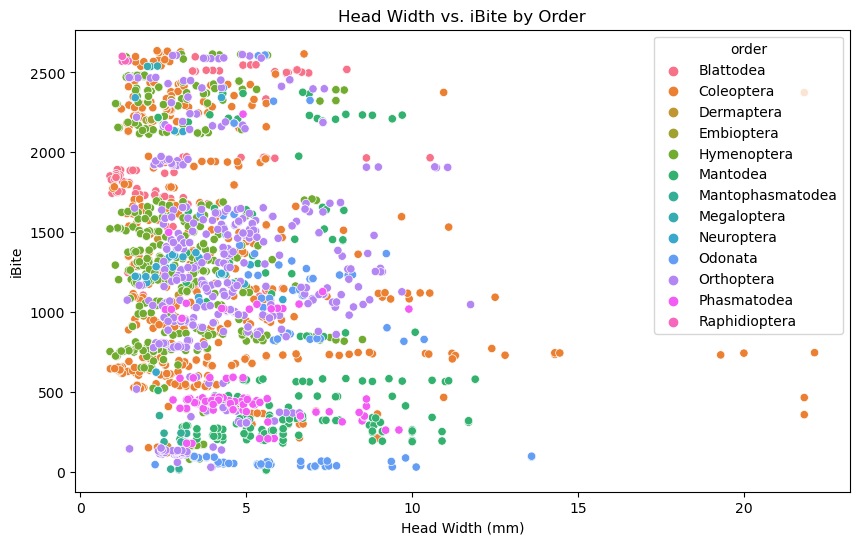

In [3]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iBite_table, x='head.w', y='iBite', hue='order')
plt.title('Head Width vs. iBite by Order')
plt.xlabel('Head Width (mm)')
plt.ylabel('iBite')
plt.show()



昆虫的头部宽度（Head Width）与其咬合力（iBite），这些数据按昆虫的目（Order）进行了颜色编码。每个点代表一个昆虫样本，横轴是头部宽度（以毫米为单位），纵轴是咬合力（未标明单位）。

不同目的昆虫在咬合力和头部宽度上有所差异。某些目（如Coleoptera）的数据点遍布整个图表，显示了这一目昆虫咬合力和头部宽度的广泛变异。而其他目则可能在某个区间内聚集得更紧密，这可能表明它们的咬合力与头部宽度的关系更为一致。



In [4]:
data_cleaned = iBite_table.dropna(subset=['latitude', 'longitude'])

cleaned_file_path = './iBite_table_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Original data rows: {iBite_table.shape[0]}, Cleaned data rows: {data_cleaned.shape[0]}")

Original data rows: 1906, Cleaned data rows: 1355


In [5]:
data_cleaned

,infraclass,cohort,order,suborder,superfamily,family,subfamily,tribe,genus,species,...,amplification,head.w,head.h,head.l,th.w,body.l,wing.l,latitude,longitude,country
11,Neoptera,Polyneoptera,Blattodea,-,Blaberoidea,Blaberidae,Diplopterinae,-,Calolampra,sp_AUS1,...,2.0,3.21,3.25,1.63,3.00,21.60,23.02,-16.101894,145.452239,Australia
12,Neoptera,Polyneoptera,Blattodea,-,Blaberoidea,Blaberidae,Diplopterinae,-,Calolampra,sp_AUS1,...,2.0,3.21,3.25,1.63,3.00,21.60,23.02,-16.101894,145.452239,Australia
13,Neoptera,Polyneoptera,Blattodea,-,Blaberoidea,Blaberidae,Epilamprinae,-,Rhabdoblatta,sp_AUS2,...,2.0,3.47,3.42,1.68,3.33,25.83,24.32,-16.101894,145.452239,Australia
14,Neoptera,Polyneoptera,Blattodea,-,Blaberoidea,Blaberidae,Epilamprinae,Morphnini,Rhabdoblatta,sp_AUS1,...,2.0,3.36,3.66,1.70,3.79,20.33,23.36,-21.169910,148.499973,Australia
31,Neoptera,Polyneoptera,Blattodea,-,Blaberoidea,Blaberidae,Pycnoscelinae,-,Pycnoscelus,surinamensis,...,2.0,3.24,3.39,1.30,4.54,16.56,0.00,50.724329,7.091239,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Neoptera,Endopterygota,Raphidioptera,-,-,Raphidiidae,Raphidiinae,Raphidiini,Phaeostigma,notata,...,20.0,1.39,0.64,1.99,1.16,10.57,9.41,50.783428,7.121031,Germany
1877,Neoptera,Endopterygota,Raphidioptera,-,-,Raphidiidae,Raphidiinae,Raphidiini,Phaeostigma,notata,...,20.0,1.44,0.70,2.00,1.17,10.33,9.04,50.783428,7.121031,Germany
1878,Neoptera,Endopterygota,Raphidioptera,-,-,Raphidiidae,Raphidiinae,Raphidiini,Phaeostigma,notata,...,20.0,1.35,0.72,1.99,1.20,9.76,8.84,50.783428,7.121031,Germany
1879,Neoptera,Endopterygota,Raphidioptera,-,-,Raphidiidae,Raphidiinae,Raphidiini,Phaeostigma,notata,...,20.0,1.26,0.71,1.87,1.32,9.56,8.10,50.783428,7.121031,Germany


order
Coleoptera       451
Hymenoptera      359
Orthoptera       351
Odonata          100
Neuroptera        30
Mantodea          24
Blattodea         20
Megaloptera        7
Raphidioptera      6
Phasmatodea        4
Dermaptera         3
Name: count, dtype: int64


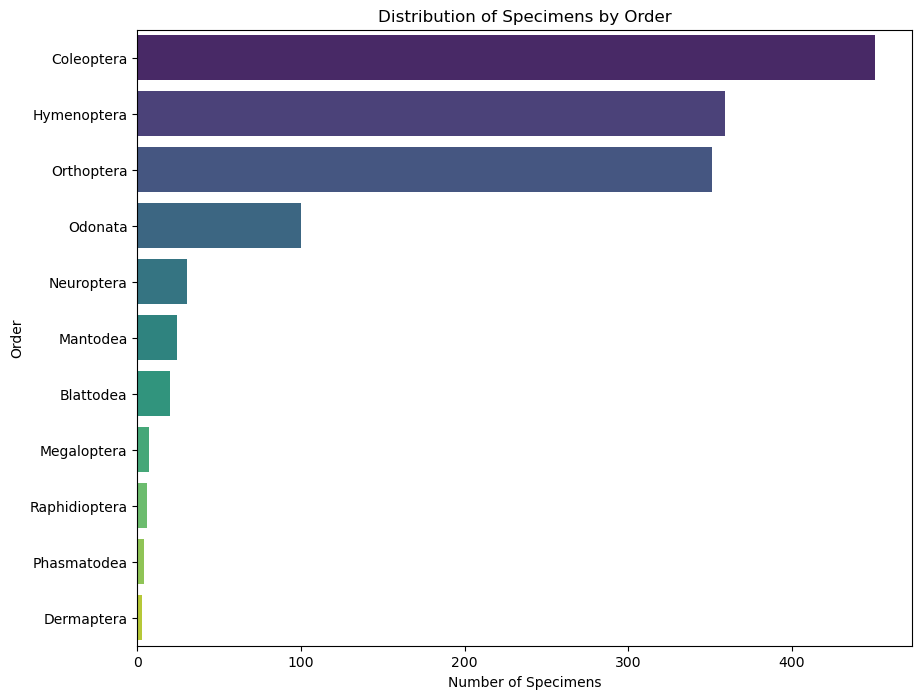

country        Australia  China  Denmark  France:Corsica  Germany  \
order                                                               
Blattodea             13      0        0               0        5   
Coleoptera            82      0        0               1      253   
Dermaptera             1      0        2               0        0   
Hymenoptera          110      0        0               4       92   
Mantodea              10      0        0               0        0   
Megaloptera            4      0        0               0        3   
Neuroptera            28      0        0               0        2   
Odonata               24      0        0               3       44   
Orthoptera            97      5        0               4      103   
Phasmatodea            4      0        0               0        0   
Raphidioptera          0      0        0               0        6   

country        Greece:Crete  Panama  Slovenia  
order                                          
Blatto

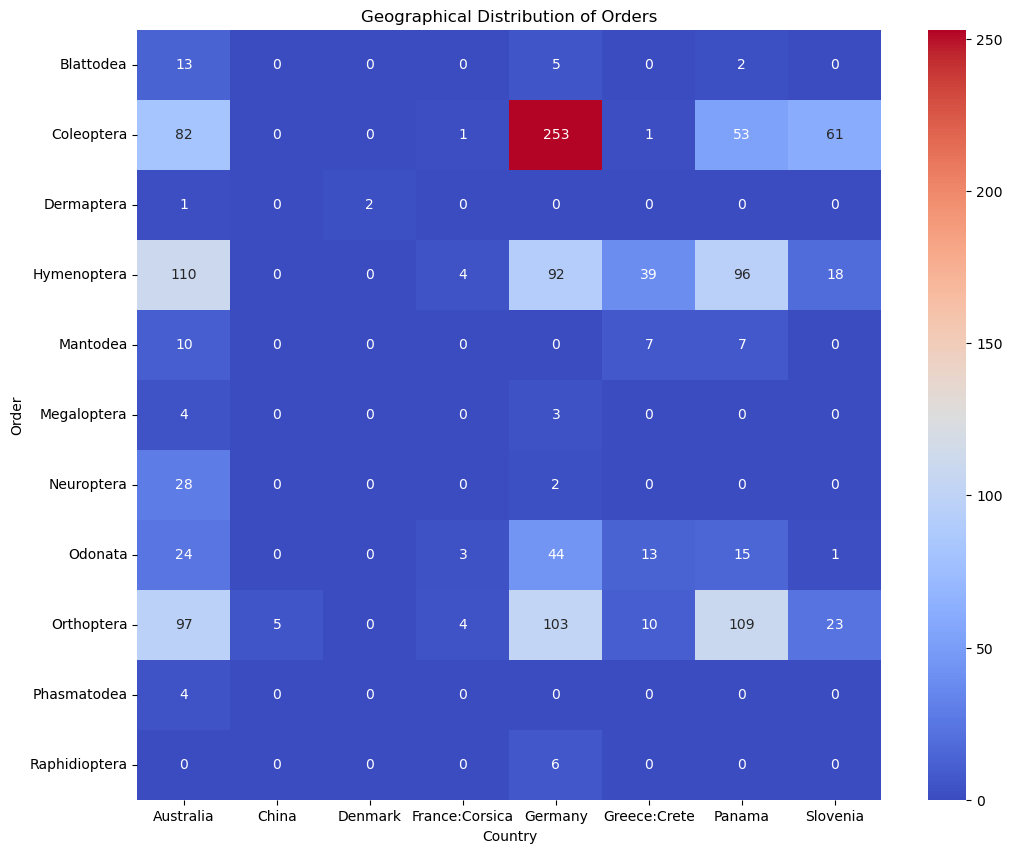

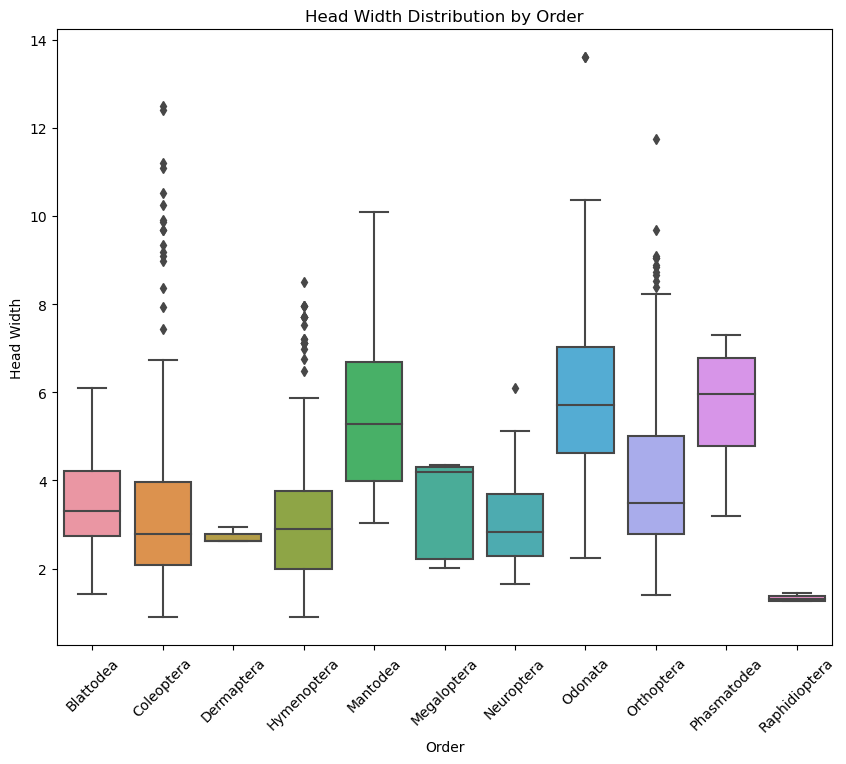

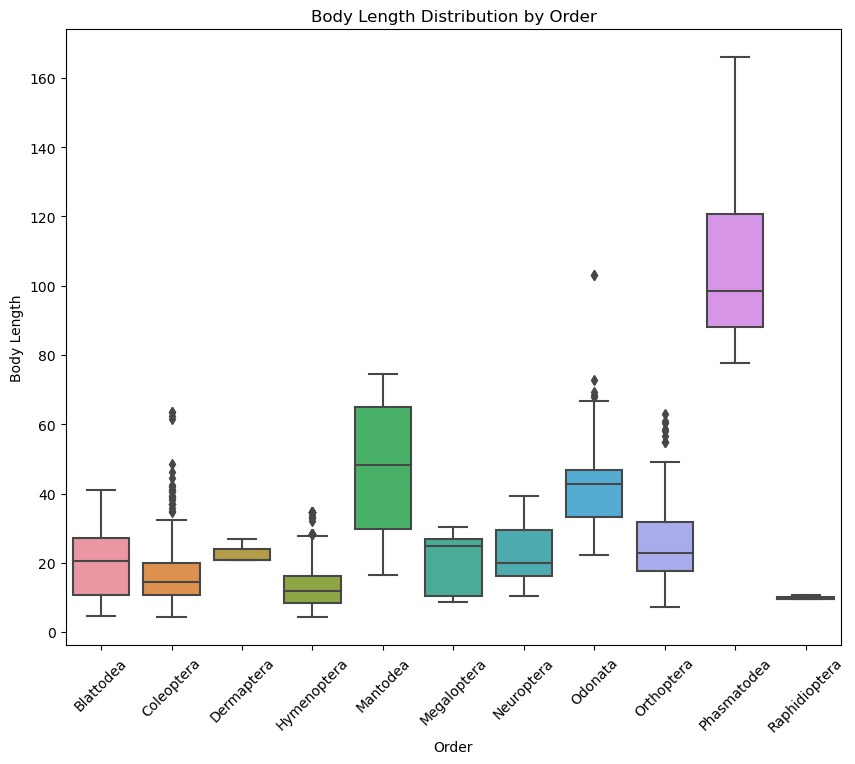

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = data_cleaned

# 1. 统计不同种群的数量
order_counts = data['order'].value_counts()
print(order_counts)

# 可视化种群数量
plt.figure(figsize=(10, 8))
sns.barplot(x=order_counts.values, y=order_counts.index, palette='viridis')
plt.xlabel('Number of Specimens')
plt.ylabel('Order')
plt.title('Distribution of Specimens by Order')
plt.show()

# 2. 地理分布
# 假设'country'列包含国家信息
country_order_distribution = data.groupby('order')['country'].value_counts().unstack(fill_value=0)
print(country_order_distribution)

# 可视化地理分布
plt.figure(figsize=(12, 10))
sns.heatmap(country_order_distribution, annot=True, cmap='coolwarm', fmt='d')
plt.title('Geographical Distribution of Orders')
plt.xlabel('Country')
plt.ylabel('Order')
plt.show()

# 3. 形态特征的分布
# 以头部宽度为例
plt.figure(figsize=(10, 8))
sns.boxplot(x='order', y='head.w', data=data)
plt.xticks(rotation=45)
plt.xlabel('Order')
plt.ylabel('Head Width')
plt.title('Head Width Distribution by Order')
plt.show()

# 以体长为例
plt.figure(figsize=(10, 8))
sns.boxplot(x='order', y='body.l', data=data)
plt.xticks(rotation=45)
plt.xlabel('Order')
plt.ylabel('Body Length')
plt.title('Body Length Distribution by Order')
plt.show()


country
Germany           508
Australia         373
Panama            282
Slovenia          103
Greece:Crete       70
France:Corsica     12
China               5
Denmark             2
Name: count, dtype: int64


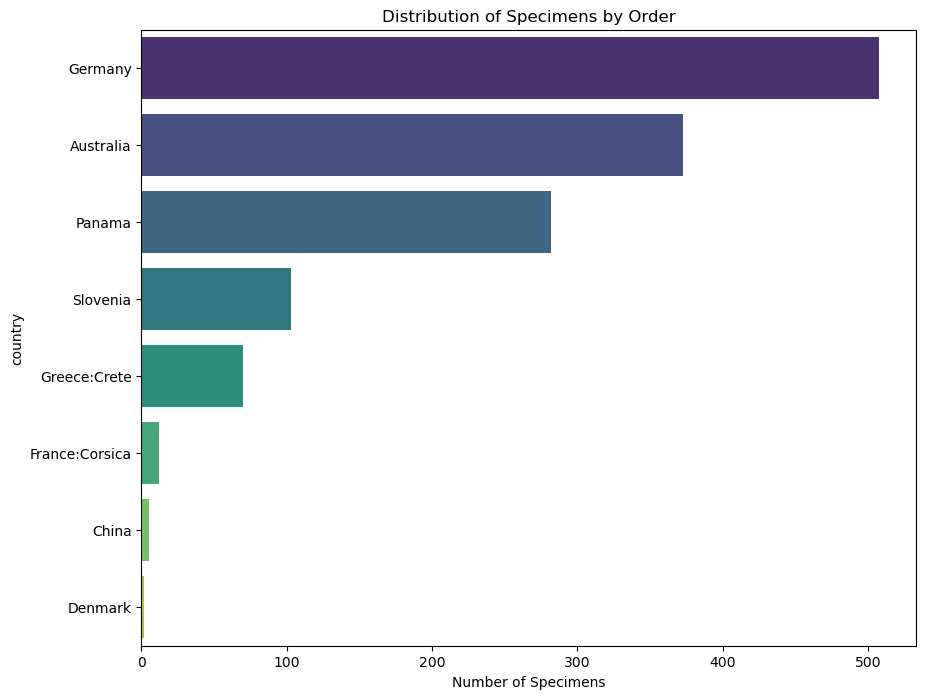

In [20]:
order_counts = data['country'].value_counts()
print(order_counts)

plt.figure(figsize=(10, 8))
sns.barplot(x=order_counts.values, y=order_counts.index, palette='viridis')
plt.xlabel('Number of Specimens')
plt.ylabel('country')
plt.title('Distribution of Specimens by Order')
plt.show()

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [8]:
# 生成合成数据
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # 添加一些噪声

In [9]:
# 使用常数核乘以RBF核作为我们的核函数
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

In [10]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [11]:
X_pred = np.linspace(0, 10, 400).reshape(-1, 1)  # 预测点
y_pred, sigma = gp.predict(X_pred, return_std=True)  # 预测结果和标准差

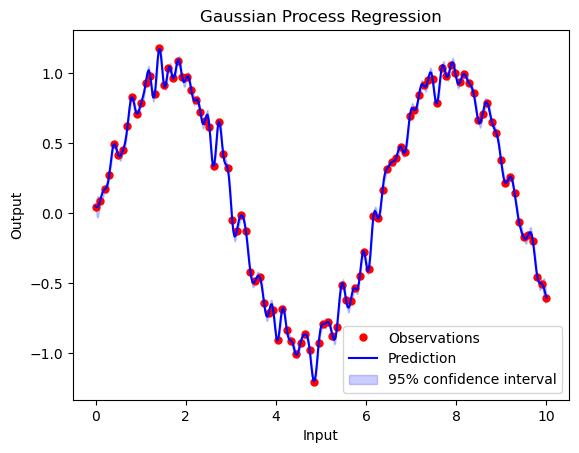

In [12]:
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(X_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

纵轴（Output）：显示的是响应变量的值，也就是你模型预测的目标变量。
横轴（Input）：显示的是自变量的值，这是影响响应变量的输入参数。
这张图主要展示了模型对于数据的拟合效果以及预测的不确定性。由于高斯过程回归提供了关于预测不确定性的自然量化（通过置信区间），它特别适用于那些对预测准确性和可靠性要求很高的应用场景。预测线（蓝色线）紧密跟随观测数据（红点）变化，显示出模型良好的拟合性能。

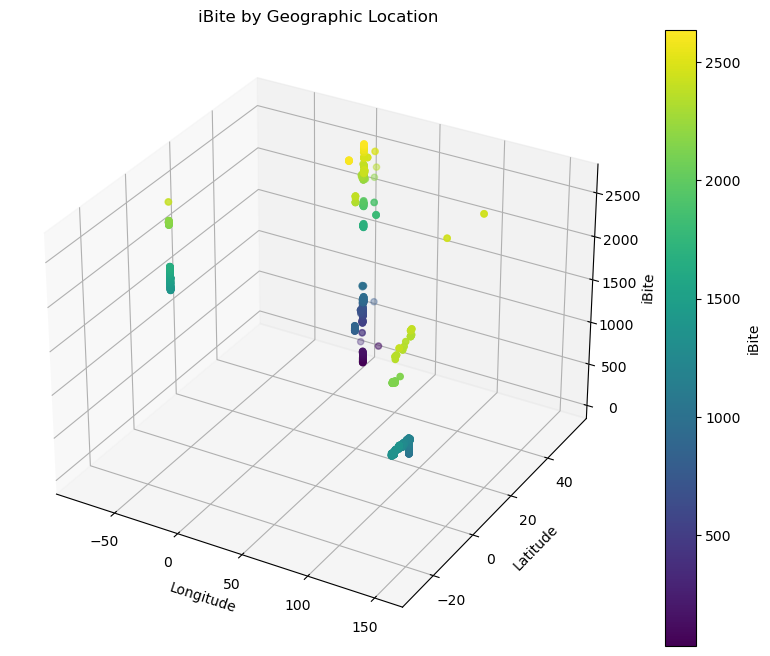

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于3D图

# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(data['longitude'], data['latitude'], data['iBite'], c=data['iBite'], cmap='viridis', label='iBite')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('iBite')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('iBite')

plt.title('iBite by Geographic Location')
plt.show()


地理分布：点的分布显示了数据覆盖的地理范围，涵盖了不同的经纬度。这可以帮助观察者理解在全球不同地区昆虫咬合力的数据分布情况。
咬合力变异：通过Z轴的咬合力值和颜色的变化，图中显示了昆虫咬合力从低到高的变化情况。颜色由紫色（低值）过渡到黄色（高值），提供了一种直观的方式来观察咬合力在不同地区的差异。
数据密度和分布：某些地区的点密集，表明在这些区域有较多的样本数据，而其他区域则样本稀疏。这种分布可能反映了采样偏差、昆虫种群的地理分布不均或研究焦点的区域差异。
研究潜力：这样的可视化提供了一种探索昆虫生理特性与其生活环境之间关系的方法。例如，研究者可以进一步分析高咬合力昆虫是否倾向于集中在特定的气候区域，或者这些特性如何与生态因素相关。
总结
这幅图不仅展示了昆虫咬合力的地理分布，还通过三维空间和颜色的使用增加了数据解读的深度和维度。这为进一步的生态学、生物地理学研究提供了有价值的视角和基础数据。通过这种方式，研究者可以更好地理解昆虫特性如何与其分布环境相适应，从而为生物保护和生态管理提供科学依据。

生态和进化研究：研究者可以探讨昆虫咬合力如何随环境变化而适应性演化。
生物地理学：了解不同地区昆虫种群的生态特征，以及这些特征如何反映地理和环境因素的影响。
保护生物学：识别可能因环境变化而受威胁的昆虫种群，特别是那些具有特定生态功能的种群。

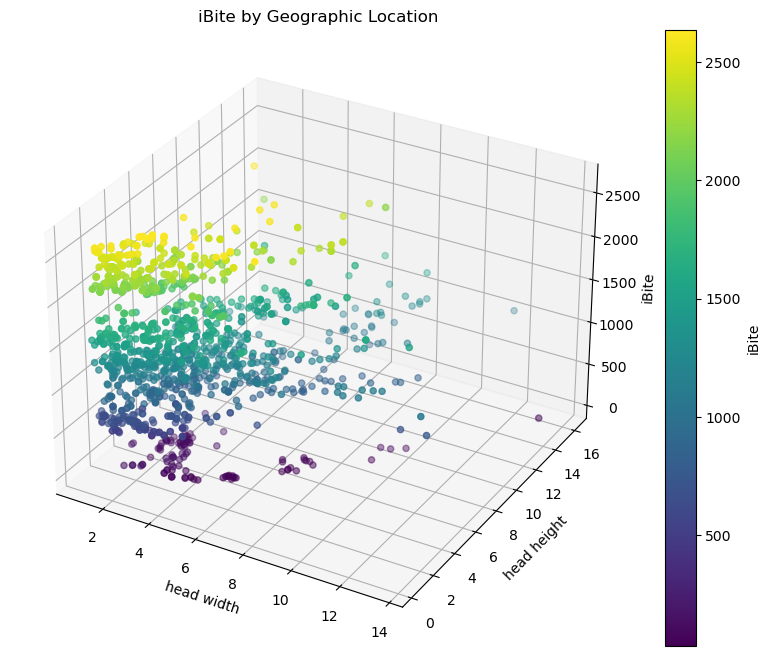

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于3D图


# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(data['head.w'], data['head.h'], data['iBite'], c=data['iBite'], cmap='viridis', label='iBite')
ax.set_xlabel('head width')
ax.set_ylabel('head height')
ax.set_zlabel('iBite')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('iBite')

plt.title('iBite by Geographic Location')
plt.show()